<a href="https://colab.research.google.com/github/Lee-F-Evans/qualtrix_survey_debotter/blob/main/KMeanClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import copy
import io
import time
from google.colab import files

from collections import Counter

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# # This will reset the color styles to the orginal (seaborn) styles
# from yellowbrick.style.rcmod import reset_orig
# reset_orig()

In [2]:
#@title ## File Upload
# upload data
uploaded = files.upload()
print(uploaded.keys)
df = pd.read_csv(list(uploaded.keys())[0])

Saving Thesis Survey Official Version_March 4, 2023_15.32.csv to Thesis Survey Official Version_March 4, 2023_15.32 (1).csv
<built-in method keys of dict object at 0x7f59dd7f0b80>


In [3]:
#Strip the metadata from the first two rows to throw back in later.
meta_data = df.iloc[:2]
#Remove first row. These are the questions text.
df = df.iloc[1:]
#Remove second row. This is unused meta data from qualtrix or whatever 
df = df.iloc[1:]

print(f'Total survey responses is: {len(df.index)}')

Total survey responses is: 1204


In [4]:
df1 = copy.deepcopy(df)
df1.columns

Index(['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel',
       'UserLanguage',
       ...
       'Q31_7_TEXT', 'Q32', 'Q32_7_TEXT', 'Q33', 'Q35', 'Q36', 'Q38',
       'Q38_10_TEXT', 'Q39', 'Q46'],
      dtype='object', length=130)

In [5]:
# ____________________________________________________________________________
# ____________________________________________________________________________
# ____________________________________________________________________________
# ____________________________________________________________________________
# ____________________________________________________________________________

In [23]:
from pandas.core.arrays.interval import NA
features = ['Q_RecaptchaScore', 'Q_RelevantIDFraudScore', 'Duration (in seconds)', 'Q24_31']

# df1 = df1.fillna(0)
# df1 = pd.to_numeric(df1)
# df1 = df1.dropna()
# df1.dropna(subset=['Q_RecaptchaScore'])
# df1 = df1[(df1.Q_RecaptchaScore) != ]
# print(df1.iloc[2].Q_RecaptchaScore)

X = df1[features]
X.head(10)

,Q_RecaptchaScore,Q_RelevantIDFraudScore,Duration (in seconds),Q24_31
2,0.899999976,0,820,1
3,0.899999976,0,610,1
4,1,0,513,1
5,1,25,159,0
6,1,0,875,0
7,1,0,650,1
8,1,0,1201,1
9,1,0,876,1
10,1,0,939,1
11,0.800000012,0,49,0


### Encoding

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
encode_labels = []
le.fit(encode_labels)
list(le.classes_)

[]

In [ ]:
X['Q24_31'] = le.transform(X['Q24_31'])

#list(le.inverse_transform([2, 2, 1]))

### Standardization

In [28]:
#code

### PCA

In [15]:
#turn the data into 2 dimensions
pca = PCA(n_components=3)
X_reduced = pca.fit(X)

print(X_reduced.explained_variance_ratio_)

[9.99997733e-01 2.26619915e-06 5.66856995e-10]


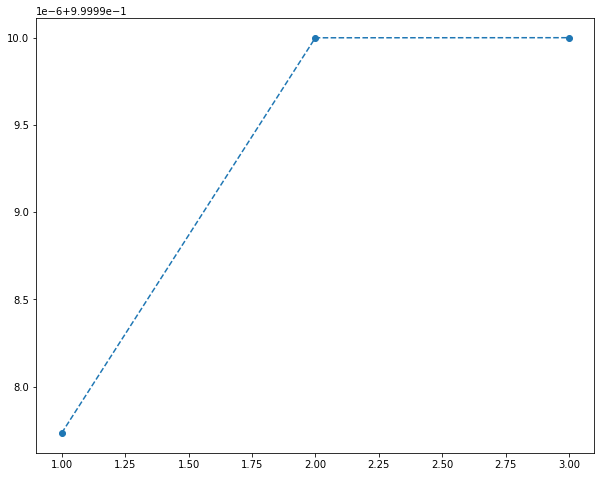

In [18]:
plt.figure(figsize = (10,8))
plt.plot(range(1,4), X_reduced.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

In [77]:
# cluster the data
model = KMeans(n_clusters=3, random_state=54)
model.fit(X)

KMeans(n_clusters=3, random_state=54)

In [80]:
X = add_column_to_dataframe(X,kmeans.labels_, 'clusters')
print(X)

        Q_RecaptchaScore Q_RelevantIDFraudScore Duration (in seconds) clusters
2                      0                      0                  1213        1
3                      0                      0                   832        1
4                      0                      0                    50        1
5                      1                      0                   387        1
6                      1                      0                     7        1
...                  ...                    ...                   ...      ...
1207  0.4000000059604645                      0                    36        1
1208                   0                      0                  1558        1
1209                   1                      0                   140        1
1210   0.699999988079071                      0                   548        1
1211  0.4000000059604645                      0                   703        1

[1210 rows x 4 columns]


In [82]:
centers = pd.DataFrame(kmeans.cluster_centers, columns=X.columns)
centers

ValueError: ignored

TypeError: ignored

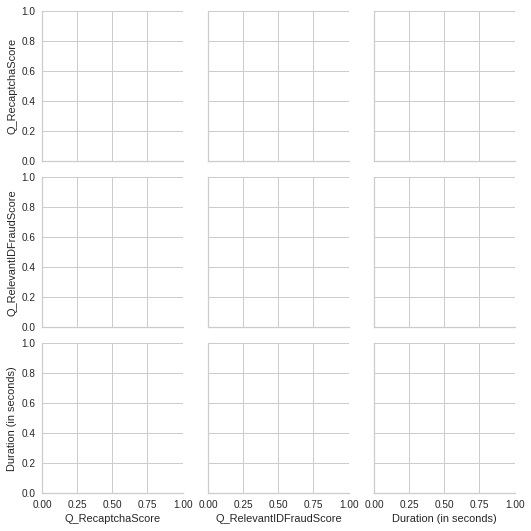

In [83]:
axes = sns.pairplot(X, vars = X.columns[:-1], hue ='clusters')

In [ ]:
plot_cluster_proportions(X['clusters'])